In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bumpplot import bumpchart
from data_gen import generate_random_rank_data

In [2]:
teams, days = 5, 10
df_num = generate_random_rank_data(teams= 5, length= 10, seed= 0)
df_num.head()

,a,b,c,d,e
0,4,5,1,2,3
1,4,3,2,5,1
2,5,2,4,1,3
3,5,3,4,1,2
4,1,5,3,2,4


In [3]:
df_date =generate_random_rank_data(teams= 5, length= 10, seed= 5)
dates = [pd.to_datetime("2019-08-10").date()]
for i in range(days-1):
    date = dates[-1]
    offset = pd.DateOffset(np.random.randint(1, 5))
    new_date = date + offset
    dates.append(new_date.date())
df_date.index = dates
df_date.head()

,a,b,c,d,e
2019-08-10,4,5,1,2,3
2019-08-14,4,3,2,5,1
2019-08-18,5,2,4,1,3
2019-08-22,5,3,4,1,2
2019-08-26,1,5,3,2,4


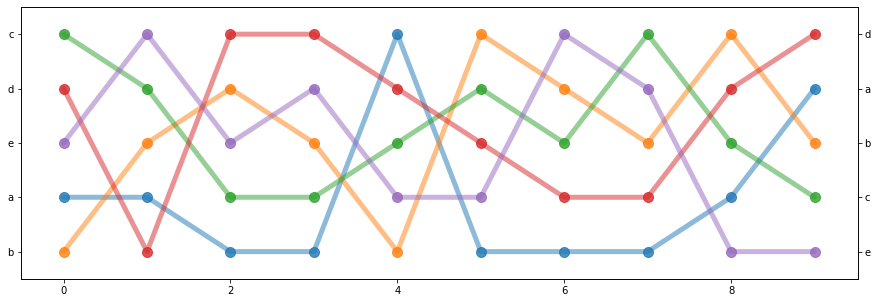

In [4]:
plt.figure(figsize=(15, 5))
bumpchart(df_num, show_rank_axis= False, scatter= True, holes= False,
          line_args= {"linewidth": 5, "alpha": 0.5}, scatter_args= {"s": 100, "alpha": 0.8})
plt.show()

c:\users\karti\envs\seaborn\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


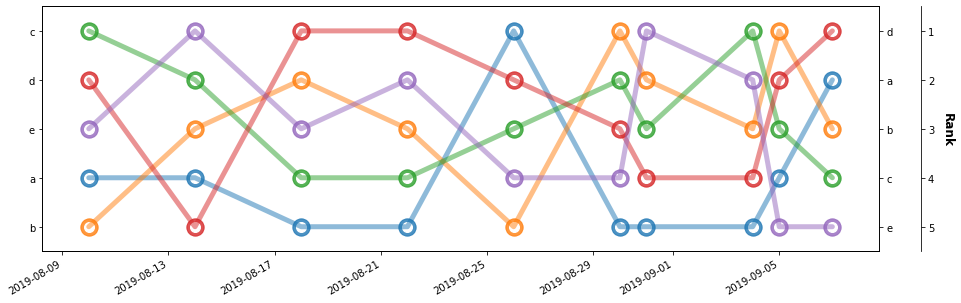

In [5]:
plt.figure(figsize=(15, 5))

[laxis, raxis, fraxis] = bumpchart(
                           df_date, show_rank_axis= True, 
                           rank_axis_distance= 1.05,
                           ax= None, 
                           scatter= True, 
                           holes= True,
                           line_args= {"linewidth": 5, "alpha": 0.5},
                           scatter_args= {"s": 300, "alpha": 0.8},
                           hole_args= {"s": 100, "alpha": 1})



laxis.set_axisbelow(True)

fraxis.set_ylabel("Rank", rotation= -90, labelpad= 20, fontsize= 12, weight= "semibold")\

plt.gcf().autofmt_xdate()

plt.show()

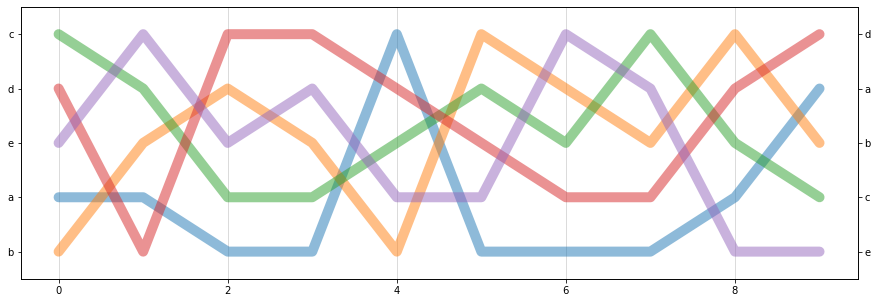

In [6]:
plt.figure(figsize=(15, 5))

[laxis, raxis] = bumpchart(df_num, show_rank_axis= False,
                           ax= None, 
                           scatter= False,
                           line_args= {"linewidth": 10, "alpha": 0.5})

laxis.xaxis.grid(color='lightgray', linestyle='solid')
plt.show()

A |sin(x)| is put over the plot to show how the y axes are inverted to show ranks.

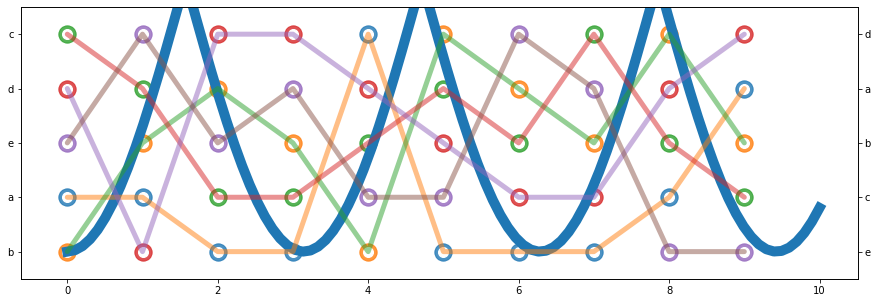

In [7]:
plt.figure(figsize=(15, 5))

x = np.linspace(0, 10, 100)
y = np.abs(np.cos(x)) * 5
plt.plot(x, y, linewidth= 10)

bumpchart(df_num, show_rank_axis= False, 
          ax= None, 
          scatter= True, 
          holes= True,
          line_args= {"linewidth": 5, "alpha": 0.5},
          scatter_args= {"s": 300, "alpha": 0.8},
          hole_args= {"s": 100, "alpha": 1})

plt.show()

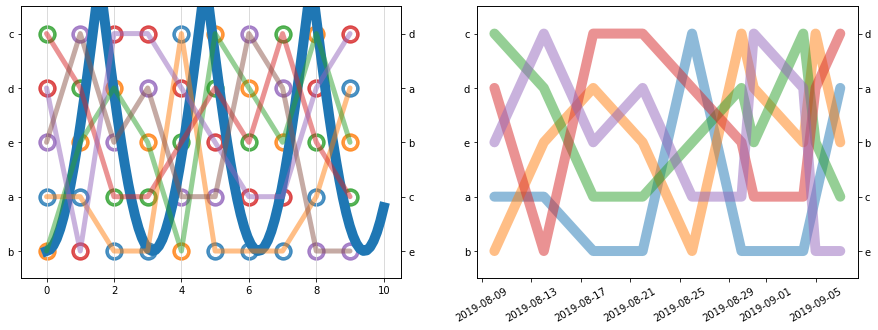

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize=(15, 5))

x = np.linspace(0, 10, 100)
y = np.abs(np.cos(x)) * 5
ax1.plot(x, y, linewidth= 10)

bumpchart(df_num, show_rank_axis= False, 
           ax= ax1, 
           scatter= True, 
           holes= True,
           line_args= {"linewidth": 5, "alpha": 0.5},
           scatter_args= {"s": 300, "alpha": 0.8},
           hole_args= {"s": 100, "alpha": 1})
ax1.xaxis.grid(color='lightgray', linestyle='solid')

bumpchart(df_date, show_rank_axis= False, 
           ax= ax2, 
           scatter= False,
           line_args= {"linewidth": 10, "alpha": 0.5})

for tick in ax2.get_xticklabels():
    tick.set_rotation(30)

plt.show()